In [129]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [130]:
##We store the .csv in data.
data = pd.read_csv('all_stocks_s&P_5Years.csv')
data

,date,open,high,low,close,volume,Name,Candle Size,Wick Size,Top Candle vs High,Bottom Candle vs Low,Classification,Prev. Candle Size,Prev. Wick Size,Prev. Top Candle vs High,Prev. Bottom Candle vs Low,Previous Classification,Growth
0,2/8/2013,15.07,15.12,14.63,14.75,8407500,AAL,-0.32,0.49,0.05,0.12,5,NaN,NaN,NaN,NaN,NaN,0
1,2/11/2013,14.89,15.01,14.26,14.46,8882000,AAL,-0.43,0.75,0.12,0.20,5,-0.32,0.49,0.05,0.12,5.0,0
2,2/12/2013,14.45,14.51,14.10,14.27,8126000,AAL,-0.18,0.41,0.06,0.17,6,-0.43,0.75,0.12,0.20,5.0,0
3,2/13/2013,14.30,14.94,14.25,14.66,10259500,AAL,0.36,0.69,0.28,0.05,8,-0.18,0.41,0.06,0.17,6.0,1
4,2/14/2013,14.94,14.96,13.16,13.99,31879900,AAL,-0.95,1.80,0.02,0.83,3,0.36,0.69,0.28,0.05,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619035,2/1/2018,76.84,78.27,76.69,77.82,2982259,ZTS,0.98,1.58,0.45,0.15,10,-1.76,1.58,0.45,0.15,10.0,1
619036,2/2/2018,77.53,78.12,76.73,76.78,2595187,ZTS,-0.75,1.39,0.59,0.05,3,0.98,1.39,0.59,0.05,3.0,0
619037,2/5/2018,76.64,76.92,73.18,73.83,2962031,ZTS,-2.81,3.74,0.28,0.65,1,-0.75,3.74,0.28,0.65,1.0,0
619038,2/6/2018,72.74,74.56,72.13,73.27,4924323,ZTS,0.53,2.43,1.29,0.61,9,-2.81,2.43,1.29,0.61,9.0,1


In [131]:
##Unique Names for each stock
data['Name'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [132]:
data['Classification'].unique()


array([ 5,  6,  8,  3,  9,  7,  4, 10,  1, 11,  2, 12], dtype=int64)

In [133]:
##We drop the rows with null values, which will eliminate the 02/08/13 values
data = data.dropna()
data

,date,open,high,low,close,volume,Name,Candle Size,Wick Size,Top Candle vs High,Bottom Candle vs Low,Classification,Prev. Candle Size,Prev. Wick Size,Prev. Top Candle vs High,Prev. Bottom Candle vs Low,Previous Classification,Growth
1,2/11/2013,14.89,15.01,14.26,14.46,8882000,AAL,-0.43,0.75,0.12,0.20,5,-0.32,0.49,0.05,0.12,5.0,0
2,2/12/2013,14.45,14.51,14.10,14.27,8126000,AAL,-0.18,0.41,0.06,0.17,6,-0.43,0.75,0.12,0.20,5.0,0
3,2/13/2013,14.30,14.94,14.25,14.66,10259500,AAL,0.36,0.69,0.28,0.05,8,-0.18,0.41,0.06,0.17,6.0,1
4,2/14/2013,14.94,14.96,13.16,13.99,31879900,AAL,-0.95,1.80,0.02,0.83,3,0.36,0.69,0.28,0.05,8.0,0
5,2/15/2013,13.93,14.61,13.93,14.50,15628000,AAL,0.57,0.68,0.11,0.00,9,-0.95,1.80,0.02,0.83,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619035,2/1/2018,76.84,78.27,76.69,77.82,2982259,ZTS,0.98,1.58,0.45,0.15,10,-1.76,1.58,0.45,0.15,10.0,1
619036,2/2/2018,77.53,78.12,76.73,76.78,2595187,ZTS,-0.75,1.39,0.59,0.05,3,0.98,1.39,0.59,0.05,3.0,0
619037,2/5/2018,76.64,76.92,73.18,73.83,2962031,ZTS,-2.81,3.74,0.28,0.65,1,-0.75,3.74,0.28,0.65,1.0,0
619038,2/6/2018,72.74,74.56,72.13,73.27,4924323,ZTS,0.53,2.43,1.29,0.61,9,-2.81,2.43,1.29,0.61,9.0,1


In [134]:
##Only the Data From AAPL, JNJ, BAC, SBUX, and T are provided.
data = data[(data.Name == "AAPL")| (data.Name =="JNJ")| (data.Name =="BAC")| (data.Name =="SBUX") | (data.Name =="T")]
data


,date,open,high,low,close,volume,Name,Candle Size,Wick Size,Top Candle vs High,Bottom Candle vs Low,Classification,Prev. Candle Size,Prev. Wick Size,Prev. Top Candle vs High,Prev. Bottom Candle vs Low,Previous Classification,Growth
1260,2/11/2013,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,1.6700,0.7157,0.4643,8,0.1400,1.6700,0.7157,0.4643,8.0,1
1261,2/12/2013,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,2.0909,0.4100,0.0223,2,0.4900,2.0909,0.4100,0.0223,2.0,0
1262,2/13/2013,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,1.4886,0.9186,0.5414,6,-1.6586,1.4886,0.9186,0.5414,6.0,0
1263,2/14/2013,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,1.0886,0.7215,0.0714,8,-0.0286,1.0886,0.7215,0.0714,8.0,1
1264,2/15/2013,66.9785,67.1656,65.7028,65.7371,97924631,AAPL,-1.2414,1.4628,0.1871,0.0343,2,0.2957,1.4628,0.1871,0.0343,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555690,2/1/2018,38.5100,39.2900,38.4010,39.1600,59963826,T,0.6500,0.8890,0.1300,0.1090,9,0.0300,0.8890,0.1300,0.1090,9.0,1
555691,2/2/2018,39.0300,39.0400,37.8100,38.0700,46098657,T,-0.9600,1.2300,0.0100,0.2600,3,0.6500,1.2300,0.0100,0.2600,3.0,0
555692,2/5/2018,37.8100,38.3100,36.6300,36.6300,45595537,T,-1.1800,1.6800,0.5000,0.0000,2,-0.9600,1.6800,0.5000,0.0000,2.0,0
555693,2/6/2018,36.0800,37.0700,35.5000,36.8300,62905300,T,0.7500,1.5700,0.2400,0.5800,9,-1.1800,1.5700,0.2400,0.5800,9.0,1


In [135]:
data['Name'].unique()


array(['AAPL', 'BAC', 'JNJ', 'SBUX', 'T'], dtype=object)

In [136]:
##The X and Y are split up into 25% Testing and 75% Training.
X_train, X_test, y_train, y_test = train_test_split(data[['Prev. Candle Size','Prev. Wick Size','Prev. Top Candle vs High','Prev. Bottom Candle vs Low']],data['Classification'], test_size=0.25)


In [137]:
X_train

,Prev. Candle Size,Prev. Wick Size,Prev. Top Candle vs High,Prev. Bottom Candle vs Low
555109,-0.280,0.240,0.010,0.13
498273,0.605,0.555,0.020,0.17
73568,0.070,0.450,0.030,0.12
73637,0.180,0.550,0.250,0.09
72971,0.010,0.170,0.020,0.08
...,...,...,...,...
317081,-0.870,0.770,0.260,0.00
316610,0.260,0.810,0.080,0.12
555079,0.430,0.350,0.110,0.19
555684,-0.760,0.405,0.095,0.04


In [138]:
y_train


555109    7
498273    8
73568     8
73637     7
72971     7
         ..
317081    9
316610    9
555079    6
555684    5
2460      2
Name: Classification, Length: 4717, dtype: int64

In [139]:
##The Logistic Regression Package is installed.
from sklearn import linear_model
mymodel = linear_model.LogisticRegression(max_iter=120000)
mymodel.fit(X_train,y_train)

LogisticRegression(max_iter=120000)

In [140]:
mymodel.predict(X_test)

array([7, 7, 5, ..., 7, 5, 9], dtype=int64)

In [141]:
mymodel.score(X_test, y_test)

0.40114431023521935

In [143]:
predicted_output = mymodel.predict(X_test)
predicted_output
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_output)
cm

array([[ 11,   2,   0,   0,   0,   0,   0,   0,   0,   0,   5,   7],
       [  1,  41,   0,   0,   0,   0,   0,   0,   0,   0,  28,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,  33,   0,  11,   0],
       [  0,   0,   2,   0,  54,   0,   0,   5,  18,   0,   0,   0],
       [  0,   0,   0,   0,  83,   7,  48,  20,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  16, 350,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  27, 379,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 102,   2,  35,  18,   0,   0,   0,   0],
       [  0,   0,   0,   0,  33,   0,   0,  13,  45,   0,   0,   0],
       [  0,   5,   2,   0,   0,   0,   0,   0,  53,   0,   6,   0],
       [  0,  52,   0,   0,   0,   0,   0,   0,   0,   0,  35,   0],
       [ 10,   3,   0,   0,   0,   0,   0,   0,   0,   0,   6,   3]],
      dtype=int64)

Text(69.0, 0.5, 'Truth or Actual Value')

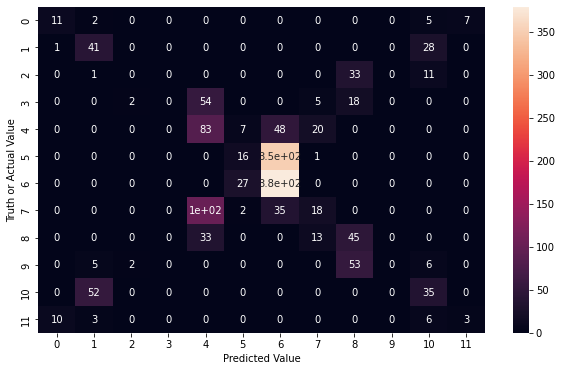

In [147]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (10,6))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')